In [1]:
import json
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
import datetime

from pandas import json_normalize

- channelGrouping : 유입 경로
- date : 방문 날짜
- device : 사용자 장치 정보
    - browser
    - browserVersion
    - browserSize
    - operatingSystem
    - operatingSystemVersion
    - isMobile : T/F
    - mobileDeviceBranding
    - mobileDeviceModel
    - mobileInputSelector
    - mobileDeviceInfo
    - mobileDeviceMarketingName
    - flashVersion
    - language
    - screenColors
    - screenResolution
    - deviceCategory
- fullVisitorId : 사용자 고유 식별자
- geoNetwork : 사용자 위치 정보
    - continent
    - subContinent
    - country
    - region
    - metro
    - city
    - cityId
    - networkDomain
    - latitude
    - longitude
    - networkLocation
- sessionId : fullVisitorId + visitId
- socialEngagementType : 참여 유형
- totals : 세션 전체 집계값(?)
    - visits
    - hits
    - pageviews
    - bounces
    - newVisits
- trafficSource : 유입 트래픽 소스
    - campaign
    - source
    - medium
    - keyword
    - adwordsClickInfo
        - criteriaParameters
    - isTrueDirect
- visitId : 식별자
- visitNumber : 세션 번호
- visitStartTime : 타임스탬프, visitId와 동일

In [2]:
# 'device', 'geoNetwork', 'totals', 'trafficSource’ 컬럼 추출
json_columns = ['device', 'geoNetwork','totals', 'trafficSource']

def load_dataframe(csv_path):
    path = csv_path
    df = pd.read_csv(path, converters={column: json.loads for column in json_columns}, 
                     dtype={'fullVisitorId': 'str'})
   
    for column in json_columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

    return df

In [3]:
train = load_dataframe('C:/Users/USER/OneDrive/바탕 화면/내일배움캠프 데이터 분석/train.csv/train.csv')

In [4]:
train.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device_browser', 'device_browserVersion', 'device_browserSize',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_isMobile', 'device_mobileDeviceBranding',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_flashVersion', 'device_language', 'device_screenColors',
       'device_screenResolution', 'device_deviceCategory',
       'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country',
       'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation', 'totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_newVisits',
       'totals_t

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device_browser                                     903653 non-null  object
 9   devi

In [7]:
device = train[['device_browser', 'device_browserVersion', 'device_browserSize',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_isMobile', 'device_mobileDeviceBranding',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_flashVersion', 'device_language', 'device_screenColors',
       'device_screenResolution', 'device_deviceCategory']]
device.head(3)

,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [8]:
device.describe(include='all')

,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory
count,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653
unique,54,1,1,20,1,2,1,1,1,1,1,1,1,1,1,3
top,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
freq,620364,903653,903653,350072,903653,664530,903653,903653,903653,903653,903653,903653,903653,903653,903653,664479


In [9]:
totals = train[['totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_newVisits',
       'totals_transactionRevenue']]
totals.head(3)

,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN


In [10]:
totals.describe(include='all')

,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
count,903653,903653,903553,450630,703060,11515
unique,1,274,213,1,1,5332
top,1,1,1,1,1,16990000
freq,903653,446754,452522,450630,703060,256


In [11]:
trafficSource = train[['trafficSource_campaign',
       'trafficSource_source', 'trafficSource_medium', 'trafficSource_keyword',
       'trafficSource_adwordsClickInfo.criteriaParameters',
       'trafficSource_isTrueDirect', 'trafficSource_referralPath',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.isVideoAd', 'trafficSource_adContent',
       'trafficSource_campaignCode']]
trafficSource.head(3)

,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
trafficSource.describe(include='all')

,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
count,903653,903653,903653,400724,903653,274005,330941,21460,21460,21561,21460,21460,10946,1
unique,10,380,7,3659,1,1,1475,8,2,17774,2,1,44,1
top,(not set),google,organic,(not provided),not available in demo dataset,True,/,1,Top,Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3Zd...,Google Search,False,Google Merchandise Collection,11251kjhkvahf
freq,865347,400788,381561,366363,903653,274005,75523,21362,20956,70,21453,21460,5122,1


In [13]:
geoNetwork = train[['geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country',
       'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation']]
geoNetwork.head(3)

,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation
0,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [14]:
df = train[['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime']]
df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386


In [15]:
df.describe(include='all')

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime
count,903653,9.036530e+05,903653,903653,903653,9.036530e+05,903653.000000,9.036530e+05
unique,8,NaN,714167,902755,1,NaN,NaN,NaN
top,Organic Search,NaN,1957458976293878100,14108533830165900_1482391162,Not Socially Engaged,NaN,NaN,NaN
freq,381561,NaN,278,2,903653,NaN,NaN,NaN
mean,NaN,2.016589e+07,NaN,NaN,NaN,1.485007e+09,2.264897,1.485007e+09
std,NaN,4.697698e+03,NaN,NaN,NaN,9.022124e+06,9.283735,9.022124e+06
min,NaN,2.016080e+07,NaN,NaN,NaN,1.470035e+09,1.000000,1.470035e+09
25%,NaN,2.016103e+07,NaN,NaN,NaN,1.477561e+09,1.000000,1.477561e+09
50%,NaN,2.017011e+07,NaN,NaN,NaN,1.483949e+09,1.000000,1.483949e+09
75%,NaN,2.017042e+07,NaN,NaN,NaN,1.492759e+09,1.000000,1.492759e+09


In [16]:
# visitNumber만 사용해도 될 것 같음
train[['totals_newVisits', 'visitNumber']].head(5)

,totals_newVisits,visitNumber
0,1,1
1,1,1
2,1,1
3,1,1
4,NaN,2


- 사용할 컬럼만 남기기

In [17]:
train_1 = train[['fullVisitorId', 'visitNumber', 'visitStartTime', 'date', 'channelGrouping',
                 'geoNetwork_continent', 'geoNetwork_country', 'device_browser', 'device_operatingSystem', 'device_deviceCategory',
                 'totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_transactionRevenue',
                 'trafficSource_campaign', 'trafficSource_source', 'trafficSource_medium', 'trafficSource_keyword']]
train_1.head()

,fullVisitorId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,device_operatingSystem,device_deviceCategory,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword
0,1131660440785968503,1,1472830385,20160902,Organic Search,Asia,Turkey,Chrome,Windows,desktop,1,1,1,1,NaN,(not set),google,organic,(not provided)
1,377306020877927890,1,1472880147,20160902,Organic Search,Oceania,Australia,Firefox,Macintosh,desktop,1,1,1,1,NaN,(not set),google,organic,(not provided)
2,3895546263509774583,1,1472865386,20160902,Organic Search,Europe,Spain,Chrome,Windows,desktop,1,1,1,1,NaN,(not set),google,organic,(not provided)
3,4763447161404445595,1,1472881213,20160902,Organic Search,Asia,Indonesia,UC Browser,Linux,desktop,1,1,1,1,NaN,(not set),google,organic,google + online
4,27294437909732085,2,1472822600,20160902,Organic Search,Europe,United Kingdom,Chrome,Android,mobile,1,1,1,1,NaN,(not set),google,organic,(not provided)


In [18]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   fullVisitorId              903653 non-null  object
 1   visitNumber                903653 non-null  int64 
 2   visitStartTime             903653 non-null  int64 
 3   date                       903653 non-null  int64 
 4   channelGrouping            903653 non-null  object
 5   geoNetwork_continent       903653 non-null  object
 6   geoNetwork_country         903653 non-null  object
 7   device_browser             903653 non-null  object
 8   device_operatingSystem     903653 non-null  object
 9   device_deviceCategory      903653 non-null  object
 10  totals_visits              903653 non-null  object
 11  totals_hits                903653 non-null  object
 12  totals_pageviews           903553 non-null  object
 13  totals_bounces             450630 non-null  

In [19]:
train_1.describe(include='all')

,fullVisitorId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,device_operatingSystem,device_deviceCategory,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword
count,903653,903653.000000,9.036530e+05,9.036530e+05,903653,903653,903653,903653,903653,903653,903653,903653,903553,450630,11515,903653,903653,903653,400724
unique,714167,NaN,NaN,NaN,8,6,222,54,20,3,1,274,213,1,5332,10,380,7,3659
top,1957458976293878100,NaN,NaN,NaN,Organic Search,Americas,United States,Chrome,Windows,desktop,1,1,1,1,16990000,(not set),google,organic,(not provided)
freq,278,NaN,NaN,NaN,381561,450377,364744,620364,350072,664479,903653,446754,452522,450630,256,865347,400788,381561,366363
mean,NaN,2.264897,1.485007e+09,2.016589e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.283735,9.022124e+06,4.697698e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.470035e+09,2.016080e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,1.477561e+09,2.016103e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,1.483949e+09,2.017011e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,1.492759e+09,2.017042e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#date 컬럼 date type으로 변경
train_1['date'] = pd.to_datetime(train_1['date'], format='%Y%m%d')

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\764109181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['date'] = pd.to_datetime(train_1['date'], format='%Y%m%d')


In [21]:
# POSIX 시간을 date type으로 변경
train_1['visitStartTime'] = pd.to_datetime(train_1['visitStartTime'], unit='s')

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2538197316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['visitStartTime'] = pd.to_datetime(train_1['visitStartTime'], unit='s')


In [22]:
# 결측치를 0으로 대체
train_1['totals_bounces'] = train_1['totals_bounces'].fillna('0')
train_1['totals_transactionRevenue'] = train_1['totals_transactionRevenue'].fillna('0')
train_1['totals_pageviews'] = train_1['totals_pageviews'].fillna('0')

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1529064200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['totals_bounces'] = train_1['totals_bounces'].fillna('0')
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1529064200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['totals_transactionRevenue'] = train_1['totals_transactionRevenue'].fillna('0')
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\1529064200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [23]:
# total 데이터 형식 전처리 > 숫자형으로
train_1['totals_visits'] = train_1['totals_visits'].astype(int)
train_1['totals_hits'] = train_1['totals_hits'].astype(int)
train_1['totals_pageviews'] = train_1['totals_pageviews'].astype(int)
train_1['totals_bounces'] = train_1['totals_bounces'].astype(int)
train_1['totals_transactionRevenue'] = train_1['totals_transactionRevenue'].astype(float)

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2811472562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['totals_visits'] = train_1['totals_visits'].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2811472562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['totals_hits'] = train_1['totals_hits'].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_2448\2811472562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [25]:
train_1.to_csv('ga4_train.csv', index=False)

In [28]:
train_df = pd.read_csv('C:/Users/USER/OneDrive/문서/GitHub/domiindeul/ga4_train.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_2448\3183126309.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('C:/Users/USER/OneDrive/문서/GitHub/domiindeul/ga4_train.csv')


In [30]:
train_df.head()

,fullVisitorId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,device_operatingSystem,device_deviceCategory,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword
0,1131660440785968503,1,2016-09-02 15:33:05,2016-09-02,Organic Search,Asia,Turkey,Chrome,Windows,desktop,1,1,1,1,0.0,(not set),google,organic,(not provided)
1,377306020877927890,1,2016-09-03 05:22:27,2016-09-02,Organic Search,Oceania,Australia,Firefox,Macintosh,desktop,1,1,1,1,0.0,(not set),google,organic,(not provided)
2,3895546263509774583,1,2016-09-03 01:16:26,2016-09-02,Organic Search,Europe,Spain,Chrome,Windows,desktop,1,1,1,1,0.0,(not set),google,organic,(not provided)
3,4763447161404445595,1,2016-09-03 05:40:13,2016-09-02,Organic Search,Asia,Indonesia,UC Browser,Linux,desktop,1,1,1,1,0.0,(not set),google,organic,google + online
4,27294437909732085,2,2016-09-02 13:23:20,2016-09-02,Organic Search,Europe,United Kingdom,Chrome,Android,mobile,1,1,1,1,0.0,(not set),google,organic,(not provided)


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fullVisitorId              903653 non-null  object 
 1   visitNumber                903653 non-null  int64  
 2   visitStartTime             903653 non-null  object 
 3   date                       903653 non-null  object 
 4   channelGrouping            903653 non-null  object 
 5   geoNetwork_continent       903653 non-null  object 
 6   geoNetwork_country         903653 non-null  object 
 7   device_browser             903653 non-null  object 
 8   device_operatingSystem     903653 non-null  object 
 9   device_deviceCategory      903653 non-null  object 
 10  totals_visits              903653 non-null  int64  
 11  totals_hits                903653 non-null  int64  
 12  totals_pageviews           903653 non-null  int64  
 13  totals_bounces             90

In [36]:
train_df['visitStartTime'] = pd.to_datetime(train_df['visitStartTime'])
train_df['date'] = pd.to_datetime(train_df['date'])

In [37]:
train_df.describe(include='all')

,fullVisitorId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,device_operatingSystem,device_deviceCategory,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword
count,9.036530e+05,903653.000000,903653,903653,903653,903653,903653,903653,903653,903653,903653.0,903653.000000,903653.000000,903653.000000,9.036530e+05,903653,903653,903653,400724
unique,7.314210e+05,NaN,NaN,NaN,8,6,222,54,20,3,NaN,NaN,NaN,NaN,NaN,10,380,7,3659
top,1.957459e+18,NaN,NaN,NaN,Organic Search,Americas,United States,Chrome,Windows,desktop,NaN,NaN,NaN,NaN,NaN,(not set),google,organic,(not provided)
freq,2.520000e+02,NaN,NaN,NaN,381561,450377,364744,620364,350072,664479,NaN,NaN,NaN,NaN,NaN,865347,400788,381561,366363
mean,NaN,2.264897,2017-01-21 14:01:30.059528448,2017-01-20 18:54:58.635206400,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.596538,3.849338,0.498676,1.704273e+06,NaN,NaN,NaN,NaN
min,NaN,1.000000,2016-08-01 07:00:12,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2016-10-27 09:39:29,2016-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2017-01-09 08:02:14,2017-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2017-04-21 07:12:42,2017-04-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.000000,4.000000,1.000000,0.000000e+00,NaN,NaN,NaN,NaN
max,NaN,395.000000,2017-08-02 06:59:53,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,500.000000,469.000000,1.000000,2.312950e+10,NaN,NaN,NaN,NaN


In [38]:
non_zero_revenue = train_df[train_df['totals_transactionRevenue']>0]
non_zero_revenue

,fullVisitorId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,device_operatingSystem,device_deviceCategory,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword
752,6194193421514403509,1,2016-09-02 19:12:52,2016-09-02,Direct,Americas,United States,Chrome,Linux,desktop,1,11,11,0,37860000.0,(not set),(direct),(none),NaN
753,5327166854580374902,3,2016-09-02 19:35:06,2016-09-02,Organic Search,Americas,United States,Chrome,Macintosh,desktop,1,11,10,0,306670000.0,(not set),google,organic,(not provided)
799,8885051388942907862,7,2016-09-02 14:43:13,2016-09-02,Referral,Americas,United States,Chrome,Linux,desktop,1,13,11,0,68030000.0,(not set),mall.googleplex.com,referral,NaN
802,185467632009737931,6,2016-09-02 19:59:58,2016-09-02,Referral,Americas,United States,Chrome,Windows,desktop,1,13,12,0,26250000.0,(not set),mall.googleplex.com,referral,NaN
859,3244885836845029978,4,2016-09-02 14:00:17,2016-09-02,Referral,Americas,United States,Chrome,Macintosh,desktop,1,17,14,0,574150000.0,(not set),mall.googleplex.com,referral,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903302,6849604863010168468,10,2017-01-04 21:45:14,2017-01-04,Referral,Americas,United States,Chrome,Macintosh,desktop,1,61,48,0,335260000.0,(not set),mall.googleplex.com,referral,NaN
903305,211986650009953276,2,2017-01-04 22:27:59,2017-01-04,Referral,Americas,United States,Chrome,Macintosh,desktop,1,66,30,0,599950000.0,(not set),mall.googleplex.com,referral,NaN
903314,9981562221973608723,1,2017-01-05 00:42:18,2017-01-04,Referral,Asia,South Korea,Chrome,Macintosh,desktop,1,122,90,0,30750000.0,(not set),mall.googleplex.com,referral,NaN
903315,963126344221316701,3,2017-01-04 17:57:54,2017-01-04,Direct,Americas,United States,Firefox,Macintosh,desktop,1,130,90,0,69390000.0,(not set),(direct),(none),NaN


DAU, WAU, MAU 라인그래프 시각화
- date
- fullVisitorId

유저별 평균접속시간의 분포를 ECDF로 시각화

방문 주차에 따른 코호트를 생성하고, 코호트 별로 weekly 리텐션을 구하고 이를 heatmap으로 시각화

요일/시간대별 사용자 수를 구하고 이를 heatmap으로 시각화
- unstack() 함수는 그룹화된 데이터프레임의 인덱스를 열로 변환하여 데이터프레임을 재구성하는 함수입니다.

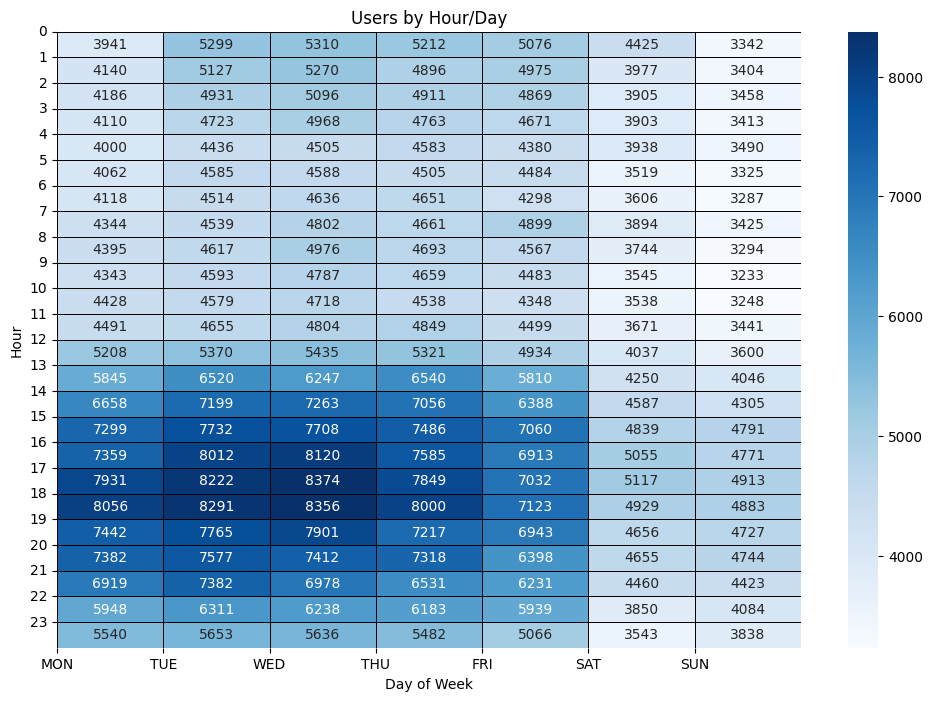

In [39]:
# 요일과 시간대 추출
train_df['day_of_week'] = train_df['visitStartTime'].dt.dayofweek
train_df['hour_of_day'] = train_df['visitStartTime'].dt.hour

# 요일/시간대별 사용자 수 계산
users_by_day_hour = train_df.groupby(['hour_of_day', 'day_of_week'])['fullVisitorId'].nunique().unstack()

# heatmap으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(users_by_day_hour, cmap='Blues', linewidths=0.5, linecolor='black', annot=True, fmt='d')
plt.title('Users by Hour/Day')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.xticks(np.arange(7), ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
plt.yticks(np.arange(24), np.arange(24))
plt.yticks(rotation=0)
plt.show()

(Challenging) 국가별 DAU 평균을 Folium으로 시각화하기

(Challenging) 캠페인 효과 분석: 캠페인으로 들어온 사람은 다른 사람과 다른 특징을 가지고 있는지 분석해보기

- totals_transactionRevenue' 이상치 확인

<Axes: xlabel='totals_transactionRevenue', ylabel='Count'>

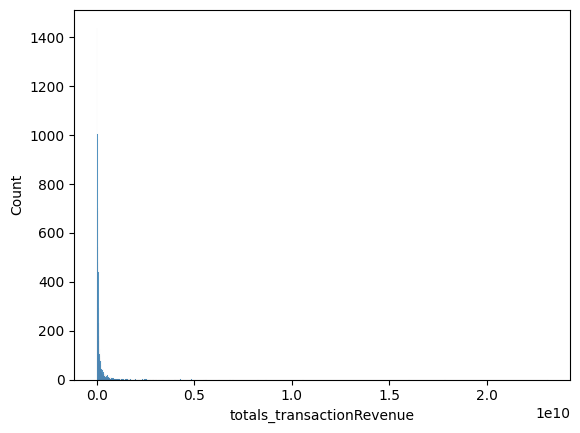

In [40]:
sns.histplot(data = non_zero_revenue, x = 'totals_transactionRevenue')

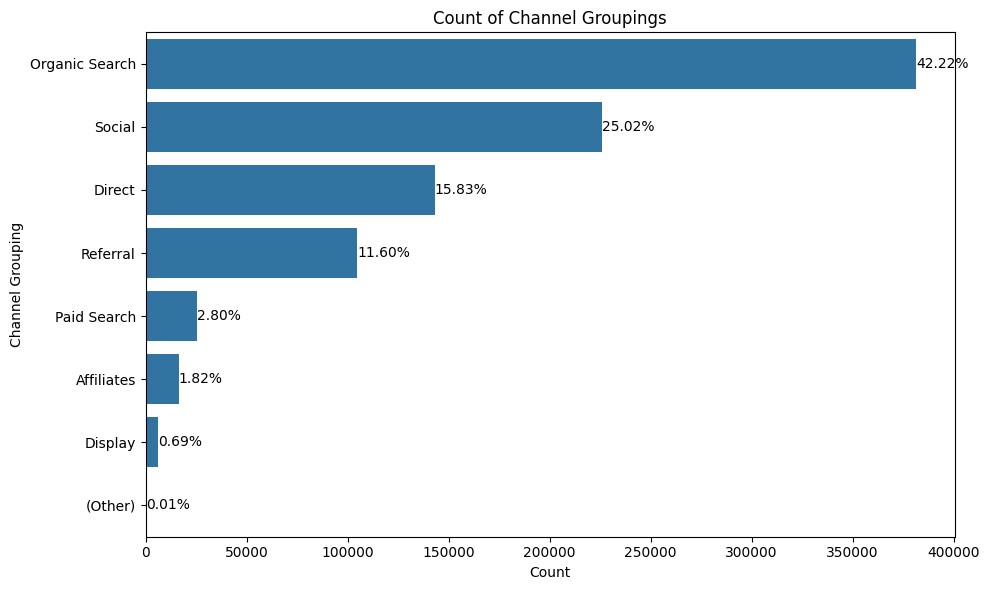

In [46]:
# channelGrouping 값별 빈도수 계산
channel_counts = train_df['channelGrouping'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax = sns.countplot(data=train_1, y='channelGrouping', order=channel_counts_sorted.index)
plt.title('Count of Channel Groupings')
plt.xlabel('Count')
plt.ylabel('Channel Grouping')

# 각 카테고리에 대한 비율 표시
total = len(train_df['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()

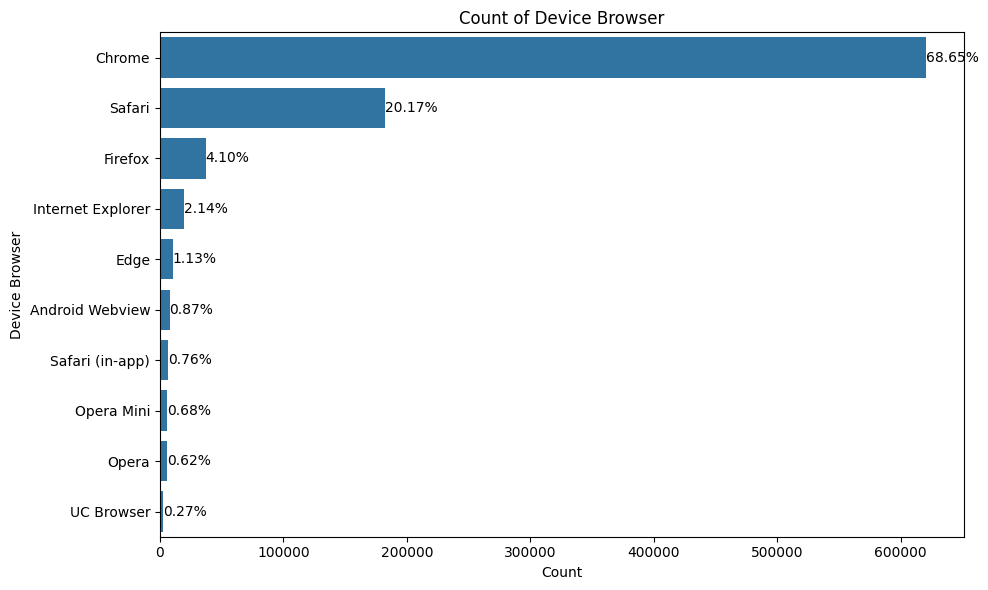

In [47]:
# device_browser 값별 빈도수 계산
channel_counts = train_df['device_browser'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_2 = sns.countplot(data=train_df, y='device_browser', order=channel_counts_sorted.index)
plt.title('Count of Device Browser')
plt.xlabel('Count')
plt.ylabel('Device Browser')

# 각 카테고리에 대한 비율 표시
total = len(train_df['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax_2.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

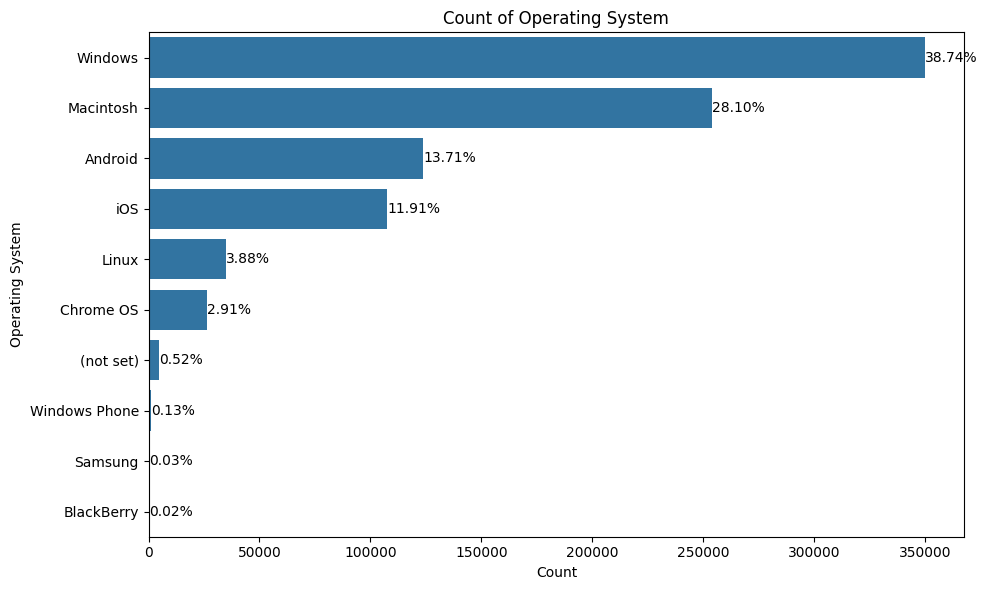

In [48]:
# device_operatingSystem 값별 빈도수 계산
channel_counts = train_df['device_operatingSystem'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_3 = sns.countplot(data=train_df, y='device_operatingSystem', order=channel_counts_sorted.index)
plt.title('Count of Operating System')
plt.xlabel('Count')
plt.ylabel('Operating System')

# 각 카테고리에 대한 비율 표시
total = len(train_df['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax_3.text(v + 3, i, f'{v / total:.2%}', va='center')

plt.tight_layout()    
plt.show

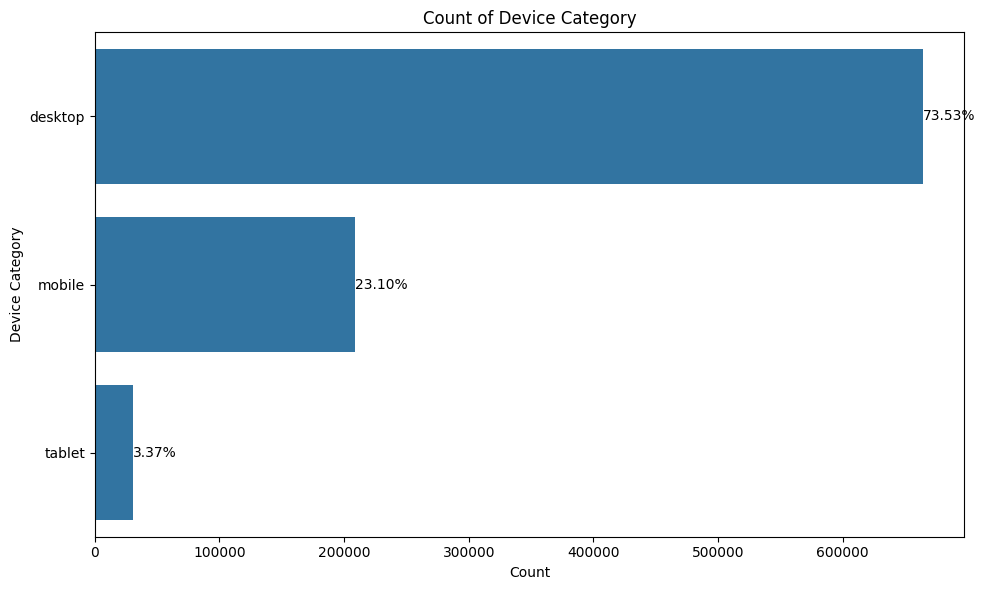

In [49]:
# device_deviceCategory 값별 빈도수 계산
channel_counts = train_df['device_deviceCategory'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_4 = sns.countplot(data=train_df, y='device_deviceCategory', order=channel_counts_sorted.index)
ax.patch.set_facecolor('none')
plt.title('Count of Device Category')
plt.xlabel('Count')
plt.ylabel('Device Category')

# 각 카테고리에 대한 비율 표시
total = len(train_df['channelGrouping'])
for i, v in enumerate(channel_counts_sorted):
    ax_4.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()

In [51]:
train_df.head()

,fullVisitorId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,device_operatingSystem,device_deviceCategory,...,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,day_of_week,hour_of_day
0,1131660440785968503,1,2016-09-02 15:33:05,2016-09-02,Organic Search,Asia,Turkey,Chrome,Windows,desktop,...,1,1,1,0.0,(not set),google,organic,(not provided),4,15
1,377306020877927890,1,2016-09-03 05:22:27,2016-09-02,Organic Search,Oceania,Australia,Firefox,Macintosh,desktop,...,1,1,1,0.0,(not set),google,organic,(not provided),5,5
2,3895546263509774583,1,2016-09-03 01:16:26,2016-09-02,Organic Search,Europe,Spain,Chrome,Windows,desktop,...,1,1,1,0.0,(not set),google,organic,(not provided),5,1
3,4763447161404445595,1,2016-09-03 05:40:13,2016-09-02,Organic Search,Asia,Indonesia,UC Browser,Linux,desktop,...,1,1,1,0.0,(not set),google,organic,google + online,5,5
4,27294437909732085,2,2016-09-02 13:23:20,2016-09-02,Organic Search,Europe,United Kingdom,Chrome,Android,mobile,...,1,1,1,0.0,(not set),google,organic,(not provided),4,13


### 유입경로별 Revenue

In [73]:
channel_revenue = train_df.groupby('channelGrouping')['totals_transactionRevenue'].sum().sort_values()
channel_revenue

channelGrouping
(Other)           9.990000e+06
Affiliates        5.973800e+08
Social            4.916540e+09
Paid Search       4.355890e+10
Display           7.833746e+10
Organic Search    3.263805e+11
Direct            4.348406e+11
Referral          6.514299e+11
Name: totals_transactionRevenue, dtype: float64

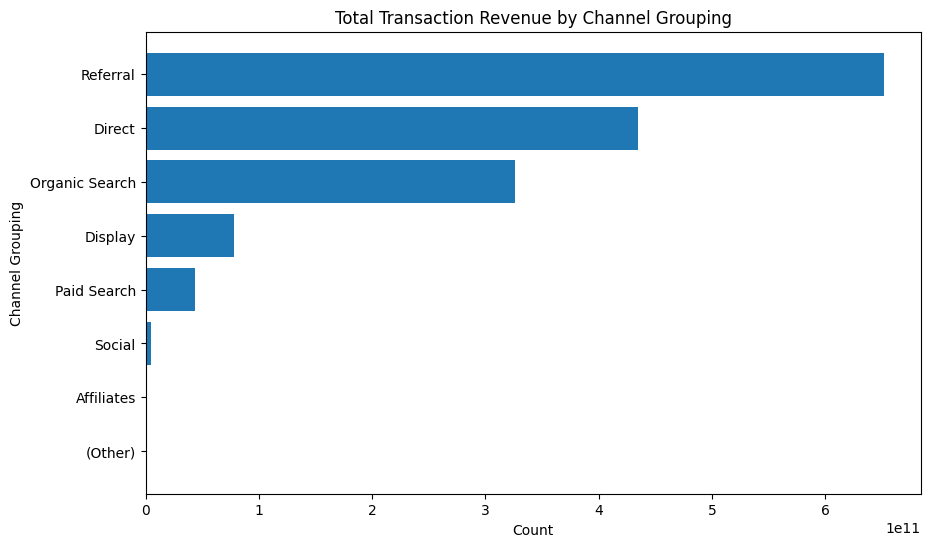

In [84]:
plt.figure(figsize=(10,6))
plt.barh(channel_revenue.index, channel_revenue.values)
plt.title('Total Transaction Revenue by Channel Grouping')
plt.xlabel('Count')
plt.ylabel('Channel Grouping')   
plt.show()

### 국가별 분석
- 'geoNetwork_continent'
- 'geoNetwork_country'

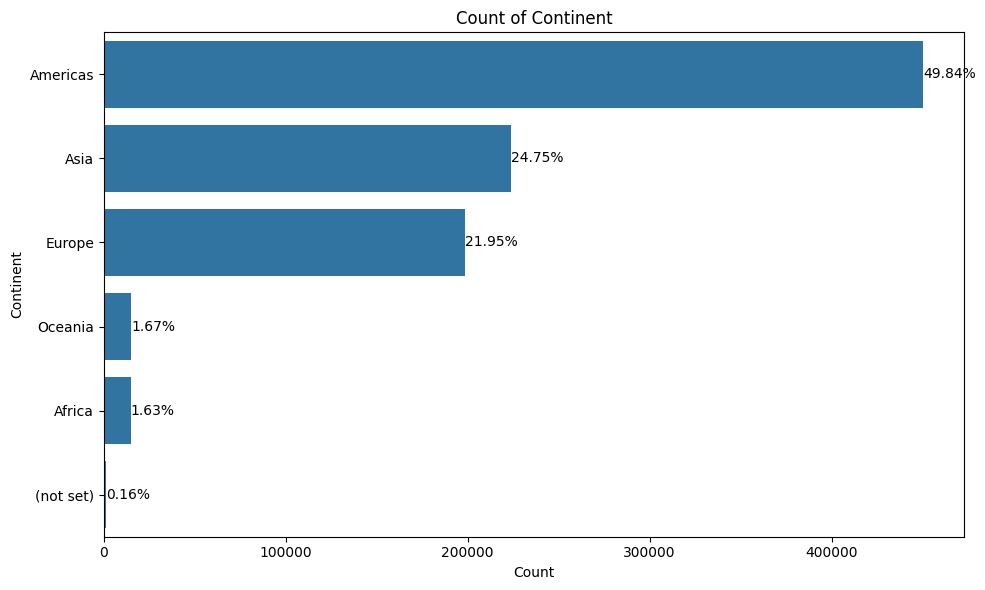

In [87]:
# geoNetwork_continent 값별 빈도수 계산
continent_counts = train_df['geoNetwork_continent'].value_counts()

# 빈도수 기준으로 데이터 정렬
continent_counts_sorted = continent_counts.sort_values(ascending=False)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_5 = sns.countplot(data=train_df, y='geoNetwork_continent', order=continent_counts_sorted.index)
ax.patch.set_facecolor('none')
plt.title('Count of Continent')
plt.xlabel('Count')
plt.ylabel('Continent')

# 각 카테고리에 대한 비율 표시
total = len(train_df['channelGrouping'])
for i, v in enumerate(continent_counts_sorted):
    ax_5.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()

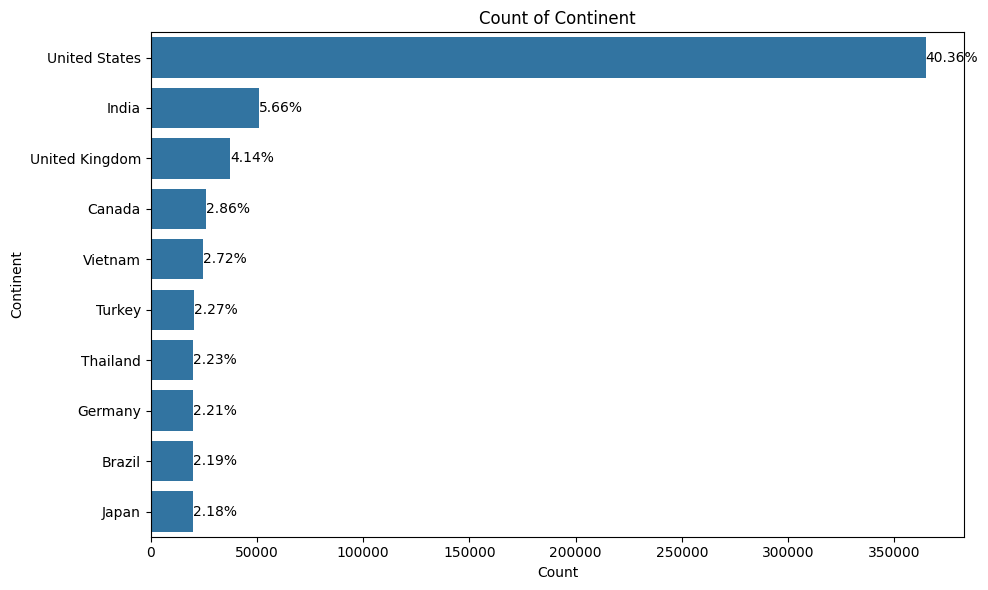

In [90]:
# geoNetwork_continent 값별 빈도수 계산
country_counts = train_df['geoNetwork_country'].value_counts()

# 빈도수 기준으로 데이터 정렬
country_counts_sorted = country_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6), facecolor='none')
ax_6 = sns.countplot(data=train_df, y='geoNetwork_country', order=country_counts_sorted.index)
ax.patch.set_facecolor('none')
plt.title('Count of Continent')
plt.xlabel('Count')
plt.ylabel('Continent')

# 각 카테고리에 대한 비율 표시
total = len(train_df['channelGrouping'])
for i, v in enumerate(country_counts_sorted):
    ax_6.text(v + 3, i, f'{v / total:.2%}', va='center')
    
plt.tight_layout()
plt.show()